# Deep Learning: Reconocimiento de números escritos a mano

> En este tutorial, tomaremos imagenes de números escritos a mano, del 0 al 9, y enseñaremos a nuestra inteligencia a saber qué número sale en la foto.



Importamos TensorFlow:

In [21]:
import tensorflow as tf

tf.__version__

'2.8.0'

Importamos el dataset de las imagenes con números escritos a mano. Normalizamos las imagenes para tener valores entre 0 y 1, para hacer más fácil el aprendizaje de la ia.

In [22]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

Creamos un modelo (secuencial), y le añadimos las capas. 
La última capa (Output) suele tener un valor igual al número de elementos del Dataset. Es decir, si nuestro Dataset tiene 10 imagenes, tendrá un valor de 10, si tiene 20, 20.

In [23]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Output Layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

Epoch 1/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2581 - accuracy: 0.9251
Epoch 2/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1048 - accuracy: 0.9674
Epoch 3/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0717 - accuracy: 0.9773


Compilamos el modelo, optimizándolo para mejores resultados. 
Entrenamos el modelo.

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Evaluamos los resultados del modelo.

In [24]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0858 - accuracy: 0.9723
0.08582133799791336 0.9722999930381775


Utilizaremos Matplotlib.pyplot para mostrar la imagen con el número que le pasemos al modelo:

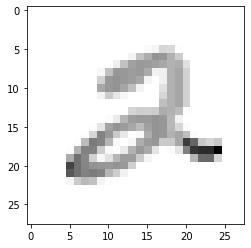

In [27]:
import matplotlib.pyplot as plt

plt.imshow(x_train[5], cmap= plt.cm.binary)
plt.show()
#print(x_train)

Guardamos el modelo:

In [26]:
model.save('handwriting_num_predict.model')

INFO:tensorflow:Assets written to: handwriting_num_predict.model/assets
